# Overview
This notebook was created to save and track my Pytorch learning Journey. This notebook is likely to have multiple sequels as this Pytorch is quite a complex and sophisticated framework

# Fundamentals

install CUDA on your local machine if a GPU is available. Don't forget to google cuda is still not available!!!

In [1]:
import torch
torch.cuda.is_available()

True

## tensors

starting with some theory ? what is a tensor ?  
Well, first assuming the existence of a basis of $n$ vectors. then a tensor of rank $m$ is a quantity that is defined by $n^m$ components. Generally this quantity represents a phenomena that can be mathematically modeled by $m$ different vectors. Each component represents a scalar associated with a combination among the possible combinations of choosing $n$ directions (from the basis vectors) $m$ times with repetition.  
HERE IS  A GREAT [REFERENCE](https://www.youtube.com/watch?v=f5liqUk0ZTw)  
resources:  
1. [torch.tensor](https://pytorch.org/docs/stable/tensors.html)
2. [ZTM course](https://www.learnpytorch.io/00_pytorch_fundamentals/)

Nevertheless, let's get more acquainted with tensors in ***Pytorch***   
1. a scalar is a tensor of dimension $0$
2. a vector is a tensor of dimension $1$
3. a matrix is a tensor of dimension $2$
4. an image is a tensor of dimension $3$

In [2]:
# Tensor
t = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]], 
                [[1, 2, 3], 
                 [1, 1, 1],
                  [2,2,2]]])

print(t.shape)
print(t.ndim)

# creating tensors is not usually done manuallym
# here is some good tensor-creation methos
t1 = torch.rand(size=(3, 4))
t2 = torch.rand(size=(2, 3, 4))

print(t1)
print(t2)


torch.Size([2, 3, 3])
3
tensor([[0.3052, 0.8864, 0.3885, 0.8860],
        [0.0616, 0.7759, 0.0038, 0.0209],
        [0.8047, 0.3166, 0.4789, 0.9957]])
tensor([[[0.7744, 0.9943, 0.4669, 0.1222],
         [0.6708, 0.0639, 0.7935, 0.1164],
         [0.1316, 0.6393, 0.9622, 0.5932]],

        [[0.7057, 0.4395, 0.3135, 0.0034],
         [0.8677, 0.2202, 0.4763, 0.0312],
         [0.9878, 0.6242, 0.2862, 0.7329]]])


In [3]:
ones1 = torch.ones(size=(3, 1))
ones2 = torch.ones(size=(3, 2))
# print(ones1, ones2, sep='\n')

# let's create some tensor and extract its characteristics
t = torch.rand(size=(2, 2, 2))
print(f"shape of tensor: {t.shape}")
print(f"data type of tensor: {t.dtype}")
print(f"the device where the tensor is stored: {t.device}")

shape of tensor: torch.Size([2, 2, 2])
data type of tensor: torch.float32
the device where the tensor is stored: cpu


Most of runtime errors would probably be cause by a mismatch of ones of these fields.

In [4]:
# as for operations with matrices, they are the same as in python, numpy
print(ones1 + ones2) # broadcasting works here
print((ones1 + 1) * (ones2 + 3.5)) # should have a (3, 2) with 9.0 for each value

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[9., 9.],
        [9., 9.],
        [9., 9.]])


In [5]:
# as for the matrix multiplication (not the element wise one)
# we should a built-in function where the result depends hugely on the arguments' dimensions
# in other words if the result of the multiplication is mathematically a vector, then the object will have only 1 dimension, if it is a scalar then it will be 0-dimensional
print(torch.mm(ones2.T, ones1).size()) # this will be 2 * 1 matrix: or a 2-dimensional vector
# if the data type is a problem, then we can convert it easily
t = torch.randn(size=(3, 4), dtype=torch.float16)
t = t.type(torch.float32)
print(t)

torch.Size([2, 1])
tensor([[ 1.3018,  1.0225,  0.3850, -0.6118],
        [ 0.0595,  1.6494, -0.4485,  1.2031],
        [ 1.3379,  0.1720,  0.8320, -0.1241]])


In [6]:
# dealing with shapes
# be mindful of views are they copied by reference
t = torch.tensor([[1, 2, 3], [2, 3, 4]], dtype=torch.float32)
t_v = t.view(1, 3, 2)

# changing a view affects the original tensor
t_v[0, 1, 1] = -1
# let's see the change reflected on 't' 
print(t, t_v, sep='\n')

tensor([[ 1.,  2.,  3.],
        [-1.,  3.,  4.]])
tensor([[[ 1.,  2.],
         [ 3., -1.],
         [ 3.,  4.]]])


In [7]:
# fed up with dimensions of value 1: squeeze() is ur best friend
squeezed_t = t_v.squeeze()
print(squeezed_t)
# with squeezing comes unsqueezing: adding another dimension of value 1: the dimension should be specified


tensor([[ 1.,  2.],
        [ 3., -1.],
        [ 3.,  4.]])


# Workflow Fundamentals
Working with ML and DL has a general outline:
1. Preparing data: the raw data can be of any format. This steps converts it to numerical tensors
2. Building a model: creating a model to fit the data
3. Train the model: let the model understand the patterns in the data
4. inference: use the patterns discoved by the model to make predictions
5. saving the model
6. Combining the results of the previous steps

## Building the model (and preparing the data...)

In [8]:
# let's start small with a simple linear regression problem
from torch import nn
import matplotlib.pyplot as plt

In [9]:
# let's get our line
w , b = 0.8, 2.5
x = torch.linspace(0, 100, 2001)
y = (w * x + b).unsqueeze(dim=1)

train_size = int(0.8 * torch.numel(x))

# train
x_train = x[:train_size]
y_train = y[:train_size]
# test
x_test = x[train_size:]
y_test = y[train_size:]

In [10]:
def plot_data(x_train, y_train, x_test, y_test, y_pred=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(x_train, y_train, label='train data', c='b', marker='*', )
    plt.scatter(x_test, y_test, label='test data', c='r', marker='+')
    if y_pred is not None:
        plt.scatter(x_test, y_pred, label='predictions', c='g', marker='o')
    plt.legend()
    plt.show()
    

In [11]:
# creating the famous linear regression model
 
class LinearRegressionModel1(nn.Module):
    def __init__(self):
        # call the super's class initialization function
        super().__init__()
        #the random value assigned to the parameter represents an initial value that can be updated thanks to requires_grad argument
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True) 

        # the bias parameter
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    # the forward function defines how the parameters are used: the final value is produced
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x * self.weights + self.bias

Let's talk about the modules needed here:
1. torch.nn: so mainly contains all the computational blocks needed for our models
2. torch.nn.Parameter: models that represents tensors of learnable parameters
3. torch.nn.Module: the parent class of all neural networks implementations: requires a concrete implementation of the forward() function
4. torch.optim: inlcudes all the optimization algorithms 

In [12]:
# let's see the model in action
torch.manual_seed(69)
m = LinearRegressionModel1()
list(m.parameters())

print(m.state_dict())

#  the parameters were set to random values
# time to make some predictions (with random parameters, cool , isn't??)

with torch.inference_mode():
    y_preds = m(x_test)

OrderedDict([('weights', tensor([-0.5259])), ('bias', tensor([-2.6043]))])


Older Pytorch code would use the torch.no_grad(), the latter is replaced by a safer and probably faster inference_mode() functionality.

tensor([-44.6755, -44.7018, -44.7281, -44.7544, -44.7807, -44.8070, -44.8333,
        -44.8596, -44.8859, -44.9122, -44.9385, -44.9648, -44.9911, -45.0173,
        -45.0436, -45.0699, -45.0962, -45.1225, -45.1488, -45.1751, -45.2014,
        -45.2277, -45.2540, -45.2803, -45.3066, -45.3329, -45.3592, -45.3855,
        -45.4118, -45.4381, -45.4644, -45.4906, -45.5169, -45.5432, -45.5695,
        -45.5958, -45.6221, -45.6484, -45.6747, -45.7010, -45.7273, -45.7536,
        -45.7799, -45.8062, -45.8325, -45.8588, -45.8851, -45.9114, -45.9377,
        -45.9640, -45.9902, -46.0165, -46.0428, -46.0691, -46.0954, -46.1217,
        -46.1480, -46.1743, -46.2006, -46.2269, -46.2532, -46.2795, -46.3058,
        -46.3321, -46.3584, -46.3847, -46.4109, -46.4372, -46.4635, -46.4898,
        -46.5161, -46.5424, -46.5687, -46.5950, -46.6213, -46.6476, -46.6739,
        -46.7002, -46.7265, -46.7528, -46.7791, -46.8054, -46.8317, -46.8580,
        -46.8843, -46.9106, -46.9368, -46.9631, -46.9894, -47.01

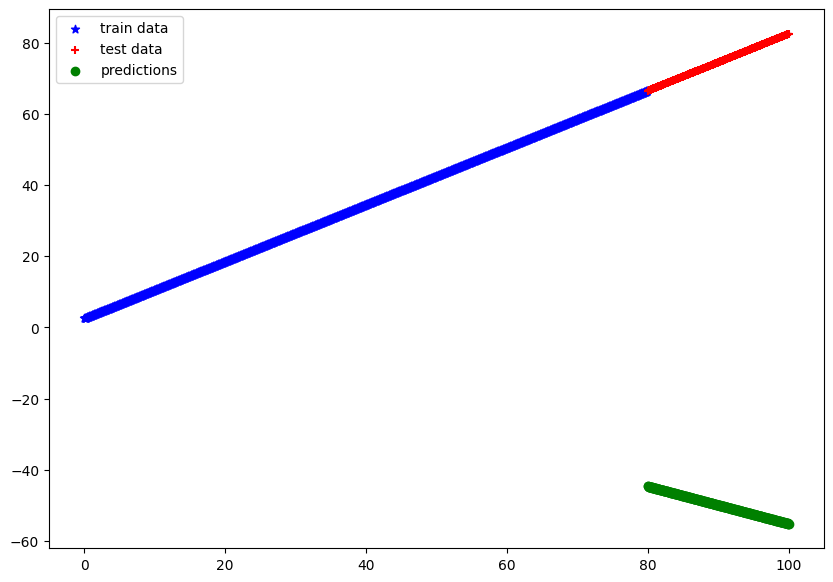

In [13]:
print(y_preds)
# let's see out predictions in action (in visualization actually xD)
plot_data(x_train, y_train, x_test, y_test, y_pred=y_preds)
# YOU CAN NOW SEE THE POWER OF RANDOM GUESSING

## Train model
After seeing the magic of random guessing, it is time for our model to get its hands (hands ??) dirty with the data (see it is a figure of speech). We will need the following:
1. loss function: determines how far our model's current estimations
2. Optimizer: an algorithm that can use the errors, the actual labels to find the optimal parameters

In [14]:
# choosing the right optimizer as well as hyperparameter tuning are not that a big of a deal in all honesty (well the more theory one has, the better in this regard)
# let's create some training loops: remember the LinearRegressionModel class, let's make it for real now

class LinearRegressionModel(nn.Module):
    def __init__(self, loss_function=None, optimizer=None, epochs:int=20, epochs_per_log:int=5):
        # first call the super class' __init__ method
        super().__init__()        

        # set the epochs' parameters        
        self.epochs = epochs # the number of epochs in the training loop
        self.epochs_per_log = epochs_per_log # how often should the error be displayed
        
        # initialize the weight(s) and bias with random values: they are scalars
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)


        # !!!! KEEP IN MIND THE OPTIMIZER SHOULD BE DEFINED AFTER THE PARAMETERS' DEFINITION

        # first set the loss function and the optimizer 
        self.loss_function = nn.MSELoss() if loss_function is None else loss_function# set to the default parameters
        self.optimizer = torch.optim.Adam(self.parameters()) if optimizer is None else optimizer(self.parameters())

        # create attributes to save the model's training progress and results
        self.train_ls = []
        self.test_ls = []


    # don't forget to implement the forward function 
    def forward(self, x: torch.tensor) -> torch.tensor:
        # is the input to our computation
        return self.weight * x + self.bias
    
    def test_model(self, X_test, Y_test, return_test_ls=False):
        # we calculate the results on the test data
        # put the model into evaluation mode
        self.eval()
        
        with torch.inference_mode(): 
            # predict the results with the current parameters
            y_pred_test = self(X_test)
            # before calculating the loss, it is crucial to verify the test's predictions are of the same shape as the target values 
            if y_pred_test.size() != Y_test.size(): 
                y_pred_test = torch.unsqueeze(y_pred_test, dim=1) # supposedly the difference is due ot have an extra dimension of length of 1 in one of the tensors

            assert y_pred_test.size() == Y_test.size()
            
            # calculate the test loss       
            test_loss = self.loss_function(y_pred_test, Y_test)
        
        if return_test_ls: 
            return y_pred_test, test_loss

        return y_pred_test

    # let's add a decent training_loop
    def train_model(self, X_train, Y_train, X_test=None, Y_test=None):
        # clear the list of previous losses
        self.test_ls.clear()
        self.train_ls.clear()        
        
        for epo in range(self.epochs):
            # set the model to the train state
            ## !!!! BEAWARE 
            
            self.train()
            # perform a forward pass: calculate the predictions with the current parameters
            y_pred_current = self(X_train)

            # making sure the predictions and the target variables are of the same shape
            if y_pred_current.size() != Y_train.size(): 
                y_pred_current = torch.unsqueeze(y_pred_current, dim=1)

            assert y_pred_current.size() == Y_train.size()

            # calculate the loss of the current predictions
            current_loss = self.loss_function(y_pred_current, Y_train)
            # set the optimizer to zero grad
            self.optimizer.zero_grad()
            # loss backward
            current_loss.backward()
            # update the parameters
            self.optimizer.step()

            if X_test is not None and Y_test is not None:
                t_preds, test_loss = self.test_model(X_test, Y_test, return_test_ls=True)
                if epo % self.epochs_per_log == 0:
                    self.train_ls.append(current_loss.detach().numpy())
                    self.test_ls.append(test_loss.detach().numpy())
                    print(f"The train loss after {epo} epochs is: {self.train_ls[-1]}\nThe test loss after {epo} epochs is: {self.test_ls[-1]}")
                    print()
        

In [15]:
# let's see how our model works
lr = LinearRegressionModel()

lr.train_model(x_train, y_train, x_test, y_test)

The train loss after 0 epochs is: 4572.9150390625
The test loss after 0 epochs is: 17231.439453125

The train loss after 5 epochs is: 4541.166015625
The test loss after 5 epochs is: 17111.966796875

The train loss after 10 epochs is: 4509.53759765625
The test loss after 10 epochs is: 16992.953125

The train loss after 15 epochs is: 4478.0390625
The test loss after 15 epochs is: 16874.431640625



In [16]:
# hmmm, mixed feelings I guess... let's add some more epochs as well as a slightly different loss function

lr = LinearRegressionModel(loss_function=nn.L1Loss(), epochs=200, epochs_per_log=20)
lr.train_model(x_train, y_train, x_test, y_test)

predictions = lr.test_model(x_test, y_test)

The train loss after 0 epochs is: 58.37435531616211
The test loss after 0 epochs is: 127.29713439941406

The train loss after 20 epochs is: 57.55486297607422
The test loss after 20 epochs is: 125.47716522216797

The train loss after 40 epochs is: 56.735374450683594
The test loss after 40 epochs is: 123.65718841552734

The train loss after 60 epochs is: 55.915889739990234
The test loss after 60 epochs is: 121.83721160888672

The train loss after 80 epochs is: 55.096397399902344
The test loss after 80 epochs is: 120.01724243164062

The train loss after 100 epochs is: 54.276912689208984
The test loss after 100 epochs is: 118.19727325439453

The train loss after 120 epochs is: 53.457420349121094
The test loss after 120 epochs is: 116.37728881835938

The train loss after 140 epochs is: 52.6379280090332
The test loss after 140 epochs is: 114.55731964111328

The train loss after 160 epochs is: 51.81844711303711
The test loss after 160 epochs is: 112.73733520507812

The train loss after 180 ep

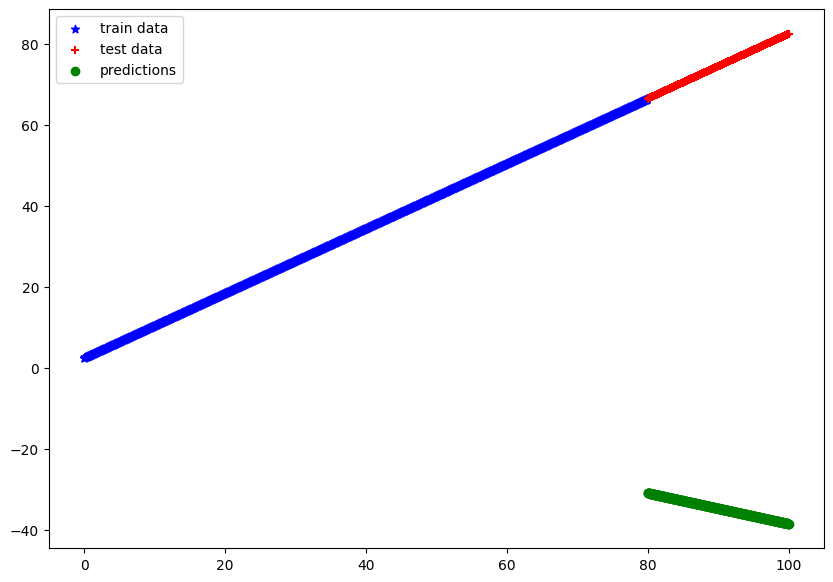

In [17]:
plot_data(x_train, y_train, x_test, y_test, y_pred=predictions)

## Saving a model
Well, it is evident that models cannot be trained every now and then to make predictions mainly when the model is large enough that training could take significant amounts of time. That's where ***saving a model*** comes to the rescue.

In [21]:
import os
# saving is done as follows:
# let's first

file_path = os.path.join(os.getcwd(), 'lr_pytorch.pth')
torch.save(obj=lr.state_dict(), f=file_path)


In [22]:
# let's load the saved model
lr_loaded = LinearRegressionModel()
lr_loaded.load_state_dict(torch.load(f=file_path))

<All keys matched successfully>

In [24]:
pred = lr_loaded.test_model(x_test, y_test)
print(all(pred == predictions)) 

True
